In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

In [ ]:
uber=pd.read_csv("/content/uber-raw-data-janjune-15_sample.csv")

In [ ]:
uber.shape

(100000, 4)

In [ ]:
uber.duplicated().sum()


54

In [ ]:
uber.drop_duplicates(inplace=True)

In [ ]:
uber.duplicated().sum()

0

In [ ]:
uber.shape

(99946, 4)

In [ ]:
uber.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [ ]:
uber.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [ ]:
type(uber['Pickup_date'][0])

str

In [ ]:
uber['Pickup_date']=pd.to_datetime(uber['Pickup_date'])

In [ ]:
uber['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

In [ ]:
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


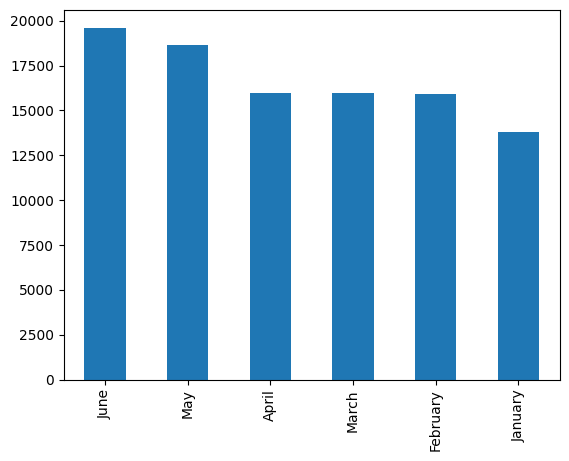

In [ ]:
uber['month']=uber['Pickup_date'].dt.month_name()
uber['month'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
uber['weekday']=uber['Pickup_date'].dt.day_name()
uber['day']=uber['Pickup_date'].dt.day
uber['hour']=uber['Pickup_date'].dt.hour
uber['minute']=uber['Pickup_date'].dt.minute
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,day,weekday,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,2,Saturday,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,20,Tuesday,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,19,Thursday,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,10,Friday,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,March,23,Monday,7,3


In [ ]:
pivot=pd.crosstab(index=uber['month'],columns=uber["weekday"])
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


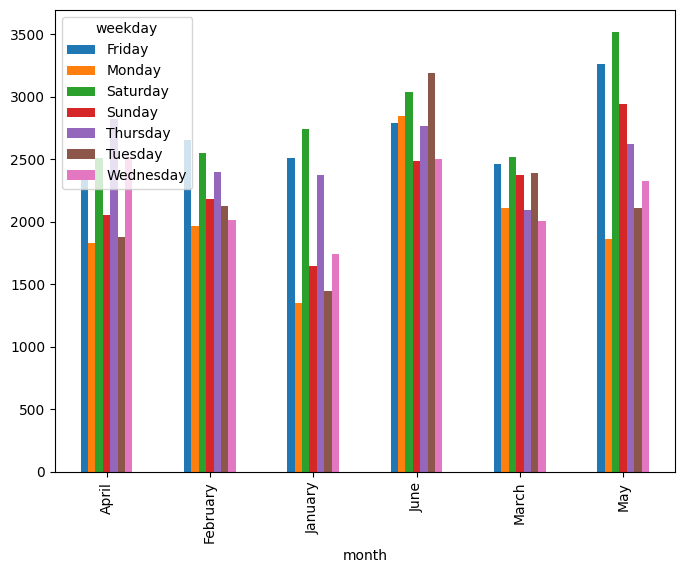

In [ ]:
pivot.plot(kind='bar',figsize=(8,6))
plt.show()

In [ ]:
a1=uber.groupby(['weekday','hour'],as_index=False).size()
a1

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


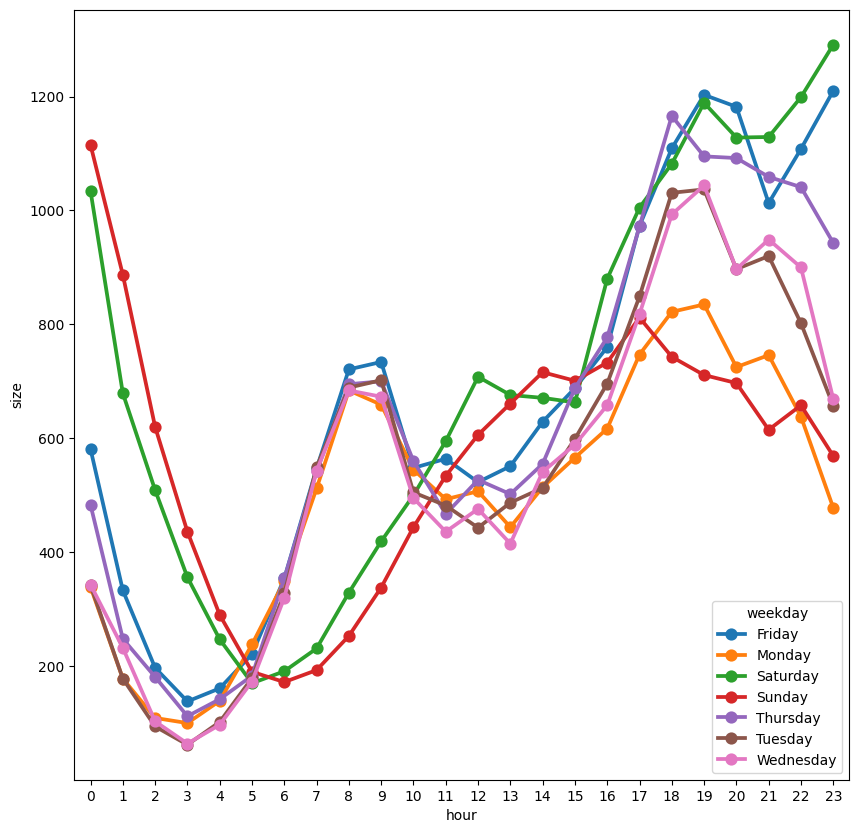

In [ ]:
plt.figure(figsize=(10,10))
sns.pointplot(x='hour',y='size',hue='weekday',data=a1)
plt.show()

In [ ]:
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,day,weekday,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,2,Saturday,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,20,Tuesday,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,19,Thursday,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,10,Friday,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,March,23,Monday,7,3


In [ ]:
uber_foil=pd.read_csv("/content/Uber-Jan-Feb-FOIL.csv")
uber_foil

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [ ]:
uber_foil.shape

(354, 4)